In [1]:
import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
import keras as k
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.models import load_model
from keras import backend as K

Using TensorFlow backend.


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
print(tf.__version__)

2.1.0


In [4]:
#data preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
img_rows, img_cols = 28,28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_test=x_test.astype('float32')
x_train=x_train.astype('float32')
mean=np.mean(x_train)
std=np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

In [5]:
#labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)

In [6]:
#build model

num_filter=32
num_dense=512
drop_dense=0.7
ac='relu'
learningrate=0.001

model = Sequential()

model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

model.add(Flatten())                        
model.add(Dense(num_dense, activation=ac))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(10, activation='softmax'))

adm=Adam(lr=learningrate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adm)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 64)       

In [7]:
# with GPU (the default in my setup)
for i in range(7):
    k=8*2**i
    print("batch size "+str(k))
    model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))

batch size 8
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 57s 953us/step - loss: 0.2267 - accuracy: 0.9334 - val_loss: 0.0713 - val_accuracy: 0.9783
batch size 16
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 30s 495us/step - loss: 0.0699 - accuracy: 0.9800 - val_loss: 0.0447 - val_accuracy: 0.9894
batch size 32
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 17s 285us/step - loss: 0.0398 - accuracy: 0.9881 - val_loss: 0.0321 - val_accuracy: 0.9901
batch size 64
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 11s 186us/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0184 - val_accuracy: 0.9944
batch size 128
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 8s 139us/step - loss: 0.0133 - 

In [13]:
# with CPU only: (tensorflow tries to use all cores available)

with tf.device("/cpu:0"):
    model = Sequential()

    model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1),padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 14x14x32

    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac,padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 7x7x64 = 3136 neurons

    model.add(Flatten())                        
    model.add(Dense(num_dense, activation=ac))
    model.add(BatchNormalization())
    model.add(Dropout(drop_dense))
    model.add(Dense(10, activation='softmax'))

    adm=Adam(lr=learningrate, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=adm)

In [8]:
with tf.device("/cpu:0"):
    for i in range(7):
        k=8*2**i
        print("batch size "+str(k))
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))

batch size 8
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 298s 5ms/step - loss: 0.1216 - accuracy: 0.9664 - val_loss: 0.0300 - val_accuracy: 0.9909
batch size 16
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 214s 4ms/step - loss: 0.0468 - accuracy: 0.9860 - val_loss: 0.0250 - val_accuracy: 0.9915
batch size 32
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 161s 3ms/step - loss: 0.0273 - accuracy: 0.9919 - val_loss: 0.0209 - val_accuracy: 0.9941
batch size 64
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0168 - accuracy: 0.9950 - val_loss: 0.0201 - val_accuracy: 0.9952
batch size 128
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 102s 2ms/step - loss: 0.0104 - accu

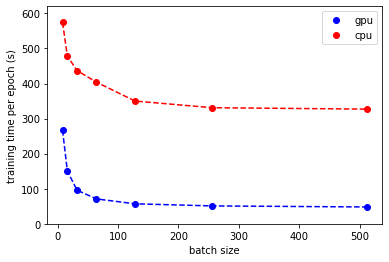

In [9]:
# plot the comparison. The training with gpu is faster by a factor of about 4-6
batch_sizes=[8,16,32,64,128,256,512]
gpu_list=[267,150,96,71,57,51,48]
cpu_list=[574,478,437,404,350,331,327]
plt.plot(batch_sizes,gpu_list,'bo')
plt.plot(batch_sizes,cpu_list,'ro')
plt.plot(batch_sizes,gpu_list,'b--')
plt.plot(batch_sizes,cpu_list,'r--')
plt.ylabel('training time per epoch (s)')
plt.xlabel('batch size')
plt.legend(['gpu', 'cpu'], loc='upper right')
plt.ylim([0,620])
#plt.savefig('CPUvsGPU.png') 
plt.show()

In [10]:
ratio_list=[j/k for (j, k) in zip(cpu_list,gpu_list)]
ratio_list

[2.149812734082397,
 3.1866666666666665,
 4.552083333333333,
 5.690140845070423,
 6.140350877192983,
 6.490196078431373,
 6.8125]